<a href="https://colab.research.google.com/github/YishaZukhrufin/PCVK/blob/main/3A_30_Yisha_Zukhrufin_Week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Yisha Zukhrufin A**

**Kelas : TI-3A**

**No.Abs : 30**

**Nim : 2141720013**


*PRAKTIKUM*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride, padding):
    #menambahkan padding menggunakan numpy.pad
    #dokumentasi numpy.pad bisa dilihat di: https://numpy.org/doc/stable/reference/generated/numpy.pad.html
    image = np.pad(image,padding, mode='constant', constant_values=0)

    #mengambil nilai width & height dari kernel dan citra masukan yang sudah ditambahkan pad
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    """
    Menentukan ukuran output dari proses konvolusi menggunakan rumus:
        [(W−K+2P)/S]+1.
    W: ukuran citra input (width / height)
    K: ukuran kernal ((width / height))
    P: nilai padding
    S: nilai stride
    """
    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    #proses konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    return new_image

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_resize = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

*fungsi konvolusi*

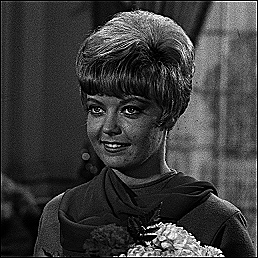

In [6]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))

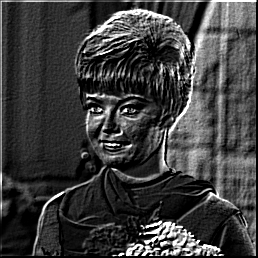

In [7]:
# Embos
embos = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, embos, 1, 2))

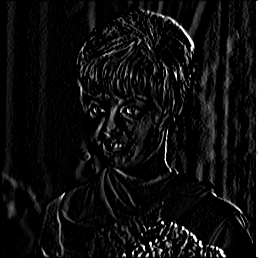

In [8]:
sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, sobel, 1, 2))

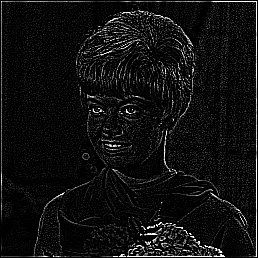

In [43]:
#Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
result_image = convolution2d(img_gray,kernel_canny,1,2)
cv2_imshow(result_image)

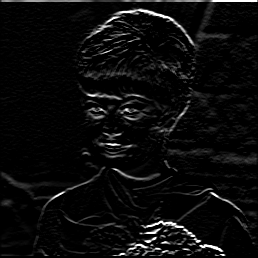

In [12]:
#Prewitt Edge Detection
kernel_sobel = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

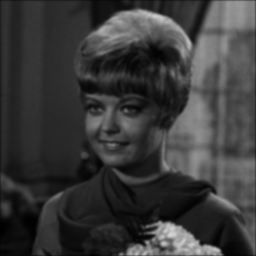

In [44]:
#5x5 Gaussian Blur
gaussian_blur_5_x_5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]], dtype=float)

gaussian_blur_5_x_5 /= 256

result_image = convolution2d(img_gray,gaussian_blur_5_x_5,1,2)
cv2_imshow(result_image)

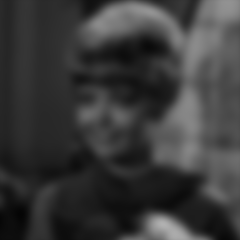

In [45]:
#21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gaussian_blur_21 = gaussian_kernel @ gaussian_kernel.transpose()

result_image = convolution2d(img_gray,gaussian_blur_21,1,2)
cv2_imshow(result_image)

*TUGAS*

A. KTP 1

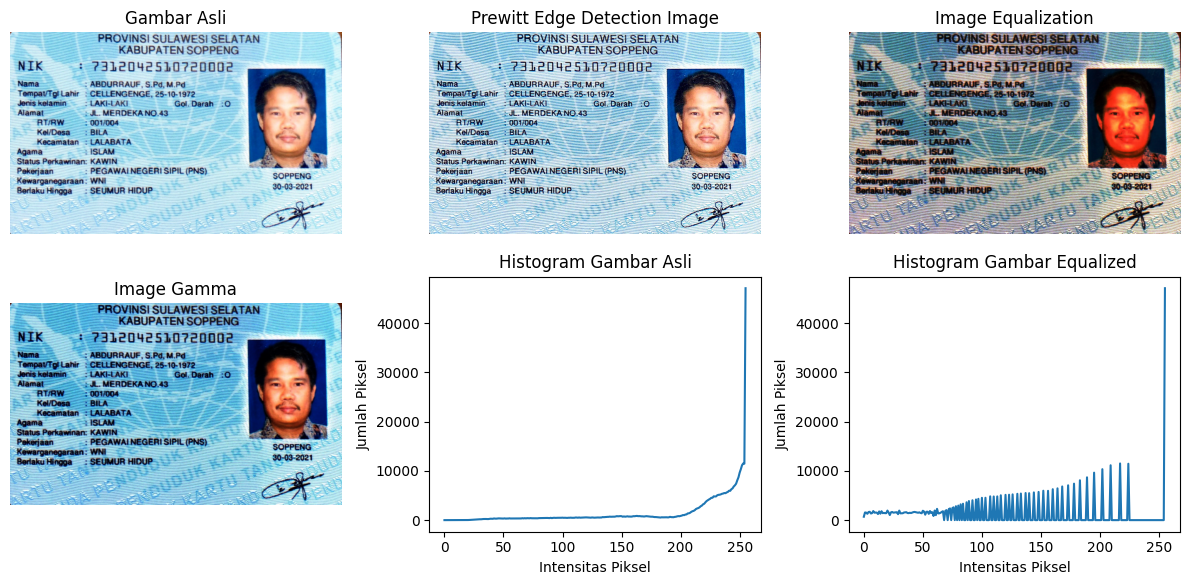

In [63]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Sharpen
kernel_prewitt= np.array([
    [0,-1,0],
    [-1, 5,-1],
    [0,-1,0]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()


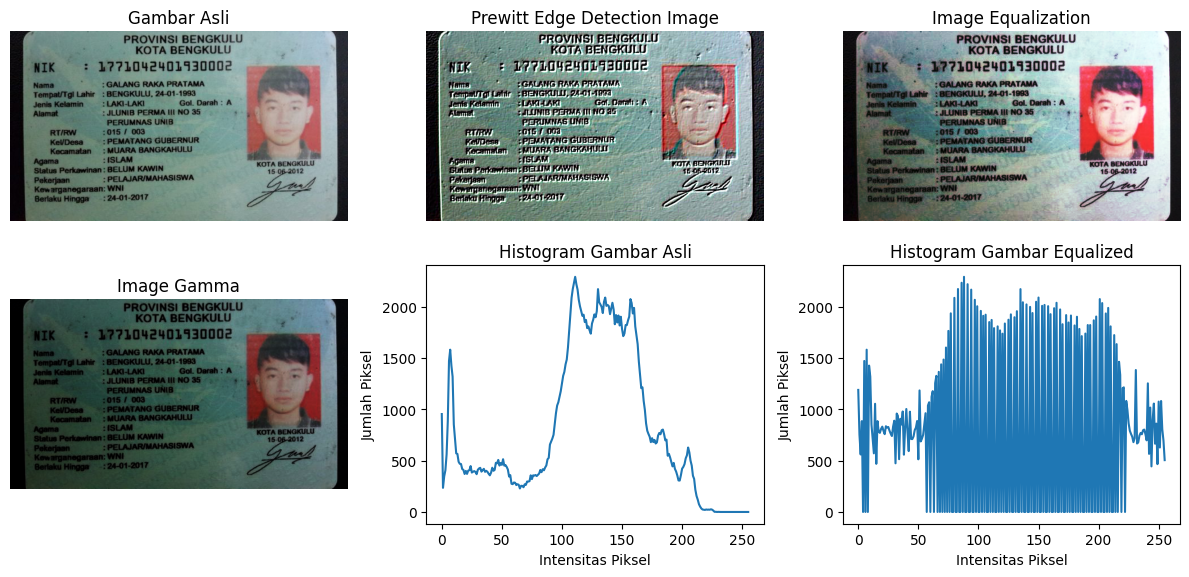

In [62]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp2.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Emboss
kernel_prewitt= np.array([
    [-2,-1,0],
    [-1, 1,1],
    [0,1,2]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

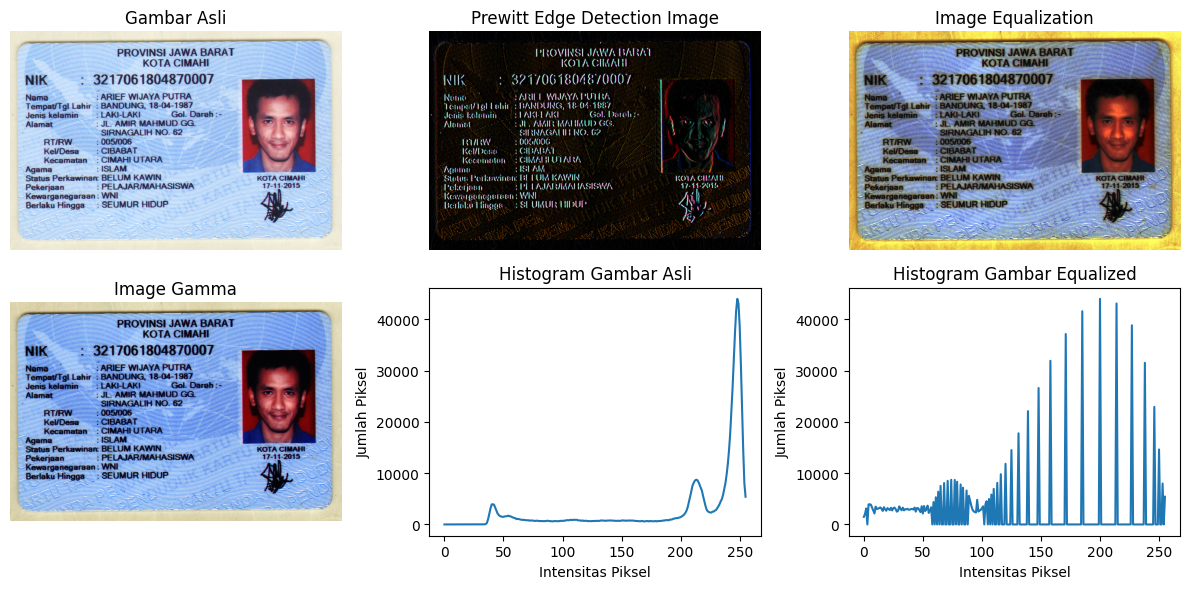

In [61]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp3.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Left Sobel Edge Detection
kernel_prewitt= np.array([
    [1,0,-1],
    [2, 0,-2],
    [1,0,-1]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

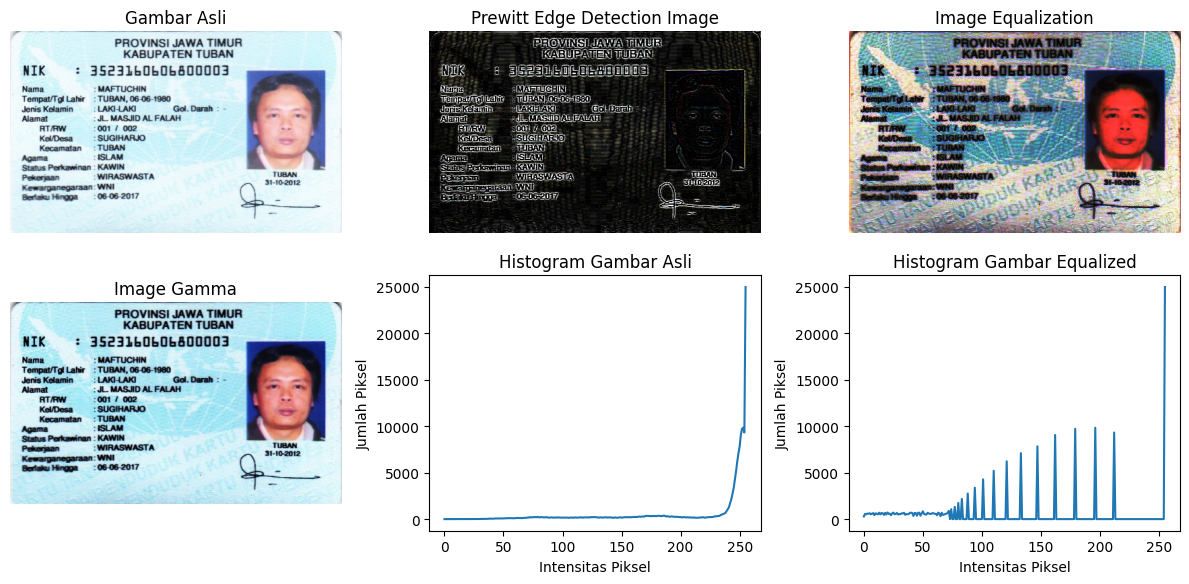

In [60]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp4.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Canny Edge Dectetion
kernel_prewitt= np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

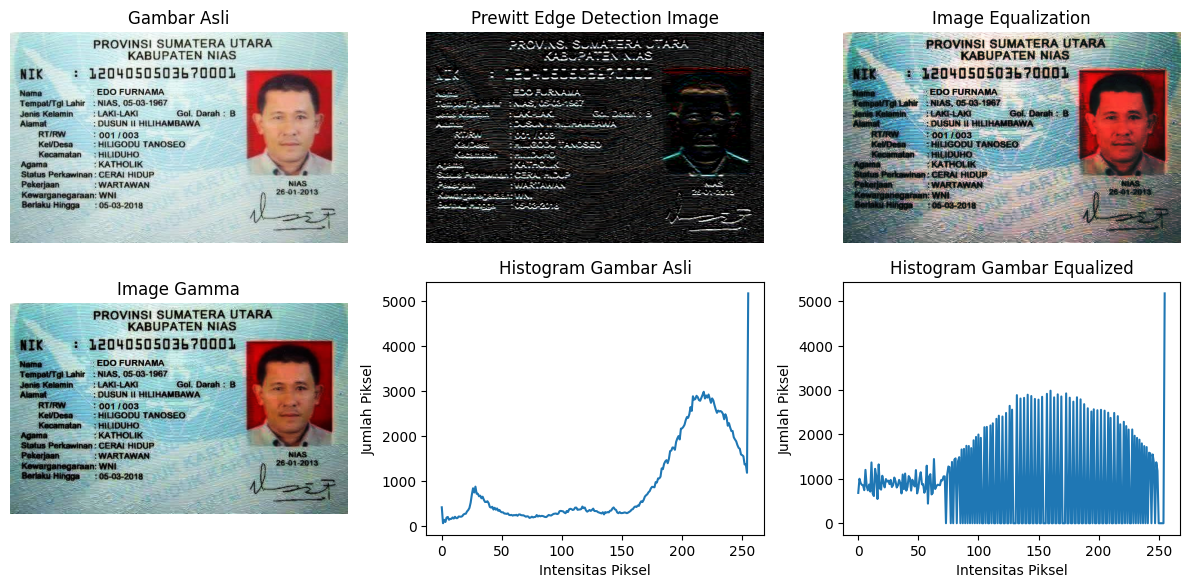

In [59]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp5.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Prewitt Edge Detection
kernel_prewitt= np.array([
    [-1,-1,-1],
    [0, 0,0],
    [1,1,1]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

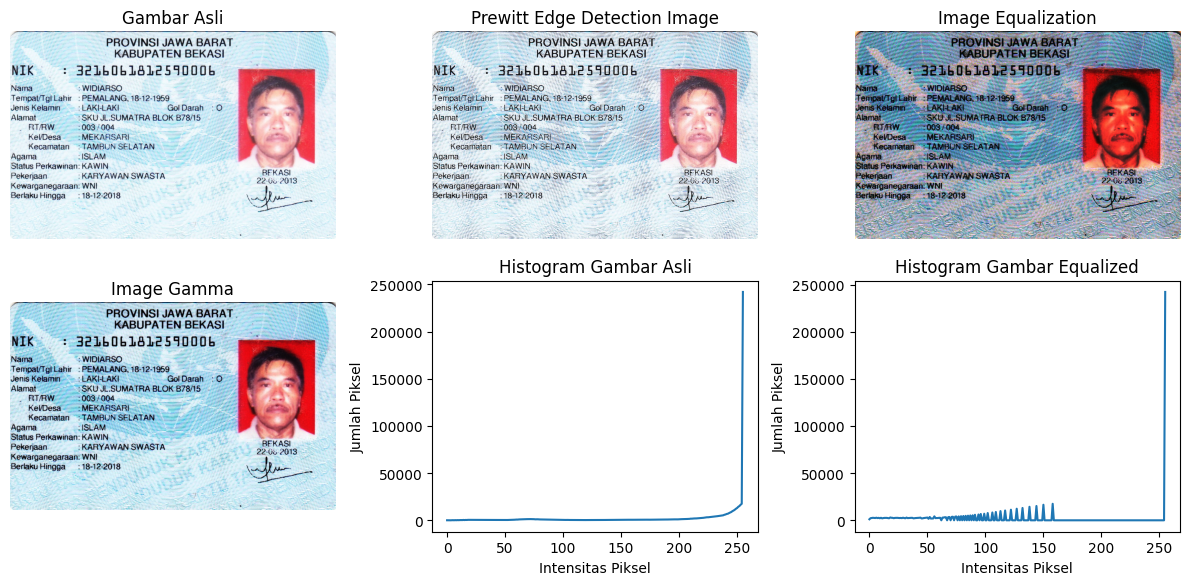

In [58]:
# Gambar KTP
image = cv.imread('/content/drive/MyDrive/PCVK/ktp6.png')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Sharpen
kernel_prewitt= np.array([
    [0,-1,0],
    [-1, 5,-1],
    [0,-1,0]
])
prewitt_image = cv.filter2D(image, -1, kernel_prewitt)

# Menggunakan metode Histogram Equalization
r, g, b = cv.split(image)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
image_result = cv.merge([r_eq, g_eq, b_eq])

# Menghitung histogram gambar asli dan gambar setelah equalisasi
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([image_result], [0], None, [256], [0, 256])

# Menggunakan metode Gamma
gamma = 0.5
gamma_image = np.zeros(image.shape, image.dtype)
for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
        gamma_image[x,y,z] = np.clip(255 * pow(image[x,y,z]/255,(1/gamma)), 0, 255)


# Menampilkan gambar
plt.figure(figsize=(12, 6))

# Gambar Asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Prewitt Edge Detection
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_BGR2RGB))
plt.title('Prewitt Edge Detection Image')
plt.axis('off')

# Equalization
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(image_result, cv.COLOR_BGR2RGB))
plt.title('Image Equalization')
plt.axis('off')

# Gamma Correction
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title('Image Gamma')
plt.axis('off')

# Histogram Gambar Asli
plt.subplot(2, 3, 5)
plt.plot(hist_original)
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

# Histogram Gambar Equalized
plt.subplot(2, 3, 6)
plt.plot(hist_equalized)
plt.title('Histogram Gambar Equalized')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()